In [10]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

## Row-wise


In [11]:
from itertools import combinations

# map_dict = {
#     "Supporting": "Supp",
#     "Mesenchymal_LHX9": "MesLHX9",
#     "Epithelial": "Epi",
#     "Endothelial": "Endo",
#     "Neural": "Neuro",
#     "missing": "Missing",
#     "Erythroid": "Eryth",
#     "Sertoli": "Sertoli",
#     "Mesenchymal_GATA2": "MesGATA2",
#     "FetalLeydig": "FLeydig",
#     "PV": "PV",
#     "CoelEpi": "CoelEpi",
#     "Immune": "Immune", 
#     "Germ": "Germ"
# }

# cell_types = list(map_dict.values())
cell_types = [
   'FLeydig', 'CoelEpi', 'Immune', 'Eryth', 'MesLHX9', 'Neuro', 'MesGATA2', 'Supp', 'Missing', 'Sertoli', 'Endo', 'Epi', 'PV'
]

all_subsets = []
for r in range(1, len(cell_types) + 1):
    all_subsets.extend(combinations(cell_types, r))

print(f"Total subsets: {len(all_subsets)}")
# Optional: to print them
# for ind, subset in enumerate(all_subsets):
#     if ind < 10000:
#         print(subset)


Total subsets: 8191


In [12]:
# filepath = "/group/tran3/gchahal/other_tissues/CardiacNetworkComponentPredictor/Duy_CardiacNetworkComponentPredictor/out/q75_week_7_9/testes.bed"
filepath = "/group/tran3/gchahal/other_tissues/CardiacNetworkComponentPredictor/Duy_CardiacNetworkComponentPredictor/out/q75_ovary_testes_from_week_7_to_9/testes.bed"
bed_df = pd.read_csv(filepath, sep="\t", header=None)

# Optionally assign column names (if known)
bed_df.columns = ["chrom", "start", "end"] + [f"col{i}" for i in range(4, bed_df.shape[1] + 1)]

print(bed_df.head())
print(bed_df.shape)


score_filepath = "/group/tran3/gchahal/other_tissues/CardiacNetworkComponentPredictor/Duy_CardiacNetworkComponentPredictor/data/scATAc_data_other_Domke_cellatlas/scores_q75_filtered_week_7_9_male_bed_file.bed"
score_df = pd.read_csv(score_filepath, sep="\t", header=None)
# Optionally assign column names (if known)
score_df.columns = ["chrom", "start", "end"] + [f"col{i}" for i in range(4, bed_df.shape[1] + 1)]
print(score_df.shape)
score_df.head()


merged_df = score_df.merge(
    bed_df[['chrom', 'start', 'end']],
    on=['chrom', 'start', 'end'],
    how='inner'
)

print(merged_df.shape)
print(merged_df.head(100))

  chrom    start      end                                               col4
0  chr1  1132587  1133945  testes_MesLHX9_Missing_Neuro_Endo_Epi_MesGATA2...
1  chr1  1298775  1300675  testes_Neuro_Missing_MesLHX9_FLeydig_Sertoli_S...
2  chr1  1324133  1325763  testes_Epi_Neuro_MesLHX9_Sertoli_Endo_Missing_...
3  chr1  1334790  1335539  testes_Neuro_Immune_Missing_MesLHX9_Epi_Supp_F...
4  chr1  1538280  1541482  testes_Neuro_Supp_MesLHX9_Endo_Sertoli_Missing...
(5159, 4)
(49084, 4)
(5159, 4)
   chrom     start       end  \
0   chr1   1132587   1133945   
1   chr1   1298775   1300675   
2   chr1   1324133   1325763   
3   chr1   1334790   1335539   
4   chr1   1538280   1541482   
..   ...       ...       ...   
95  chr1  45359564  45360454   
96  chr1  46569613  46570550   
97  chr1  47432160  47435732   
98  chr1  47521183  47522087   
99  chr1  47676915  47677844   

                                                 col4  
0   MesLHX9_13_Epi_4_Endo_6_Neuro_11_Missing_4_Mes...  
1   Supp_1

In [13]:
# import pandas as pd
# import re

# # Suppose your dataframe is called df
df = merged_df.copy()
import pandas as pd
import re

# Example dataframe: df

def extract_counts(col4_value):
    matches = re.findall(r'(\w+?)_(\d+)', col4_value)
    count_dict = {}
    for cell_type, count in matches:
        # Remove leading underscores
        cleaned_name = cell_type.lstrip('_')
        if cleaned_name in count_dict:
            count_dict[cleaned_name] += int(count)
        else:
            count_dict[cleaned_name] = int(count)
    return count_dict

# Create per-cell-type columns
cell_counts_df = df['col4'].apply(extract_counts).apply(pd.Series)

# Fill missing values with 0
cell_counts_df = cell_counts_df.fillna(0)

# Merge back to original df
df = pd.concat([df, cell_counts_df], axis=1)

# Find dominant cell type and corresponding count
df['dominant_cell_type'] = cell_counts_df.idxmax(axis=1)
df['dominant_count'] = cell_counts_df.max(axis=1)
print(df['dominant_cell_type'].value_counts())
df



# def get_dominant_info(col4_value):
#     # Find all cell type-count pairs
#     matches = re.findall(r'(\w+?)_(\d+)', col4_value)
#     if matches:
#         # List of (cell_type, count)
#         cell_counts = [(cell_type, int(count)) for cell_type, count in matches]
#         # Find cell type with max count
#         dominant = max(cell_counts, key=lambda x: x[1])
#         return pd.Series([dominant[0], dominant[1]])
#     else:
#         return pd.Series([None, None])

# df[['dominant_cell_type', 'dominant_count']] = df['col4'].apply(get_dominant_info)

# print(df['dominant_cell_type'].value_counts())

dominant_cell_type
MesGATA2    3980
Neuro        782
MesLHX9      329
Endo          36
Sertoli       26
Supp           4
Missing        1
Immune         1
Name: count, dtype: int64


,chrom,start,end,col4,MesLHX9,Epi,Endo,Neuro,Missing,MesGATA2,PV,CoelEpi,Supp,Sertoli,FLeydig,Immune,Eryth,dominant_cell_type,dominant_count
0,chr1,1132587,1133945,MesLHX9_13_Epi_4_Endo_6_Neuro_11_Missing_4_Mes...,13.0,4.0,6.0,11.0,4.0,39.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,MesGATA2,39.0
1,chr1,1298775,1300675,Supp_18_MesLHX9_12_Epi_4_Endo_6_Neuro_55_Missi...,12.0,4.0,6.0,55.0,12.0,22.0,0.0,2.0,18.0,4.0,5.0,5.0,0.0,Neuro,55.0
2,chr1,1324133,1325763,Supp_37_MesLHX9_88_Epi_20_Endo_30_Neuro_110_Mi...,88.0,20.0,30.0,110.0,33.0,122.0,9.0,3.0,37.0,38.0,13.0,19.0,2.0,MesGATA2,122.0
3,chr1,1334790,1335539,Supp_8_MesLHX9_15_Epi_3_Neuro_30_Missing_9_Ery...,15.0,3.0,0.0,30.0,9.0,15.0,2.0,1.0,8.0,0.0,2.0,2.0,2.0,Neuro,30.0
4,chr1,1538280,1541482,Supp_37_MesLHX9_86_Epi_11_Endo_20_Neuro_98_Mis...,86.0,11.0,20.0,98.0,31.0,164.0,11.0,0.0,37.0,26.0,19.0,10.0,1.0,MesGATA2,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,chrY,2841070,2842124,Supp_7_MesLHX9_13_Epi_4_Endo_5_Neuro_37_Missin...,13.0,4.0,5.0,37.0,6.0,34.0,2.0,1.0,7.0,8.0,7.0,2.0,0.0,Neuro,37.0
5155,chrY,2933715,2936612,Supp_54_MesLHX9_137_Epi_20_Endo_30_Neuro_158_M...,137.0,20.0,30.0,158.0,44.0,216.0,14.0,4.0,54.0,40.0,21.0,28.0,7.0,MesGATA2,216.0
5156,chrY,6908857,6912037,Supp_30_MesLHX9_60_Epi_19_Endo_10_Neuro_80_Mis...,60.0,19.0,10.0,80.0,14.0,56.0,8.0,4.0,30.0,13.0,7.0,10.0,0.0,Neuro,80.0
5157,chrY,12420813,12421968,Supp_18_MesLHX9_17_Epi_10_Endo_6_Neuro_43_Miss...,17.0,10.0,6.0,43.0,10.0,25.0,1.0,0.0,18.0,17.0,7.0,5.0,0.0,Neuro,43.0


In [15]:
import pandas as pd

# List of cell types you provided
dominant_cell_types = ["MesGATA2", "Neuro", "MesLHX9", "Endo", "Sertoli", "Supp", "Missing", "Immune"]

for cell_type in dominant_cell_types:
    # Filter rows where dominant_cell_type matches
    df_subset = df[df['dominant_cell_type'] == cell_type][['chrom', 'start', 'end']]
    
    # Construct output file name without threshold
    output_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/{cell_type}_row_wise.bed"
    
    # Save as BED file (tab-separated, no header, no index)
    df_subset.to_csv(output_file, sep='\t', header=False, index=False)
    
    print(f"Saved {len(df_subset)} regions to {output_file}")


Saved 3980 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/MesGATA2_row_wise.bed
Saved 782 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/Neuro_row_wise.bed
Saved 329 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/MesLHX9_row_wise.bed
Saved 36 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/Endo_row_wise.bed
Saved 26 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/Sertoli_row_wise.bed
Saved 4 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/Supp_row_wise.bed
Saved 1 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/Missing_row_wise.bed
Saved 1 regions to /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/row_wise/testes/Immune_row_wise.bed

## Celltype-wise

This involves defining a threshold

In [7]:
# Go through each row and update the set
# Initialize an empty set
all_cell_types = set()

for val in bed_df['col4']:
    parts = val.split("_")
    # Remove 'testes' if present
    parts = [p for p in parts if p != "testes"]
    all_cell_types.update(parts)

print(all_cell_types)

{'Sertoli', 'Neuro', 'FLeydig', 'MesLHX9', 'MesGATA2', 'CoelEpi', 'PV', 'Eryth', 'Missing', 'Endo', 'Immune', 'Supp', 'Epi'}


In [71]:
from itertools import combinations
from tqdm import tqdm
# Your given cell types list
cell_types = [
   'FLeydig', 'CoelEpi', 'Immune', 'Eryth', 'MesLHX9', 'Neuro', 'MesGATA2', 'Supp', 'Missing', 'Sertoli', 'Endo', 'Epi', 'PV'
]

# Generate all non-empty subsets
all_subsets = []
for r in range(1, len(cell_types) + 1):
    all_subsets.extend(combinations(cell_types, r))

results = []
col4_values = merged_df["col4"].astype(str)

for subset in tqdm(all_subsets, desc="Processing subsets"):
    subset_set = set(subset)
    matched_indices = []

    for idx, val in enumerate(col4_values):
        # Parse cell types from string
        parts = val.split("_")
        row_cell_types = set(parts[::2])
        row_cell_types.discard("testes")

        if row_cell_types == subset_set:
            matched_indices.append(idx)

    results.append({
        "subset": subset,
        "subset_length": len(subset),
        "row_index": matched_indices,
        "match_count": len(matched_indices)
    })

# Convert to DataFrame
subset_df = pd.DataFrame(results)

# Example output
subset_df

Processing subsets: 100%|██████████| 8191/8191 [00:39<00:00, 205.22it/s]


,subset,subset_length,row_index,match_count
0,"(Supp,)",1,[],0
1,"(MesLHX9,)",1,[],0
2,"(Epi,)",1,[],0
3,"(Endo,)",1,[],0
4,"(Neuro,)",1,[],0
...,...,...,...,...
8186,"(Supp, MesLHX9, Epi, Neuro, Missing, Eryth, Se...",12,"[222, 805, 1136, 2524, 2923, 4229, 4319, 5130]",8
8187,"(Supp, MesLHX9, Endo, Neuro, Missing, Eryth, S...",12,"[240, 256, 453, 773, 1063, 1279, 1657, 1781, 2...",22
8188,"(Supp, Epi, Endo, Neuro, Missing, Eryth, Serto...",12,[],0
8189,"(MesLHX9, Epi, Endo, Neuro, Missing, Eryth, Se...",12,[1863],1


In [8]:
# test_rows = [435, 490, 709, 816, 1273, 2078, 2133, 2282, 2446, 2535, 3356, 3569, 3681, 3808, 3949, 4006, 4034, 4630, 4793, 4991, 5073]
# test_rows = [4819]
# test_rows = [5, 6, 17, 23, 26, 41, 43, 49, 58, 75, 92, 96, 98, 103, 107, 117, 134, 136, 178, 180, 197, 202, 208, 212, 215, 218, 229, 233, 234, 242, 244, 247, 253, 267, 284, 285, 286, 291, 292, 295, 297, 298, 307, 313, 318, 325, 329, 335, 336, 338, 342, 343, 344, 364, 368, 369, 382, 404, 416, 457, 471, 483, 490, 499, 506, 509, 518, 519, 539, 559, 564, 571, 573, 575, 577, 581, 604, 610, 614, 622, 627, 638, 645, 647, 676, 677, 678, 687, 688, 697, 699, 709, 726, 727, 736, 740, 746, 749, 771, 787, 793, 794, 800, 802, 806, 810, 819, 823, 824, 828, 834, 840, 842, 844, 858, 871, 884, 895, 913, 914, 924, 938, 944, 947, 952, 954, 956, 960, 977, 984, 1017, 1019, 1040, 1056, 1088, 1106, 1108, 1109, 1135, 1140, 1152, 1171, 1174, 1189, 1193, 1195, 1196, 1214, 1220, 1242, 1247, 1271, 1274, 1280, 1309, 1313, 1344, 1356, 1386, 1389, 1390, 1398, 1407, 1415, 1436, 1438, 1439, 1465, 1471, 1481, 1496, 1497, 1540, 1544, 1545, 1548, 1550, 1567, 1573, 1580, 1587, 1592, 1596, 1600, 1606, 1610, 1617, 1631, 1649, 1650, 1671, 1677, 1679, 1682, 1724, 1726, 1729, 1732, 1737, 1738, 1747, 1752, 1757, 1758, 1777, 1783, 1808, 1813, 1825, 1827, 1831, 1837, 1838, 1853, 1862, 1869, 1881, 1883, 1890, 1916, 1917, 1919, 1923, 1926, 1935, 1957, 1968, 1971, 1976, 1990, 2011, 2014, 2024, 2027, 2037, 2055, 2072, 2078, 2087, 2092, 2093, 2095, 2104, 2116, 2118, 2136, 2141, 2142, 2159, 2180, 2184, 2187, 2188, 2194, 2195, 2211, 2212, 2214, 2216, 2234, 2238, 2244, 2258, 2263, 2264, 2276, 2305, 2315, 2317, 2319, 2324, 2342, 2373, 2387, 2393, 2400, 2403, 2404, 2424, 2437, 2443, 2450, 2452, 2453, 2461, 2466, 2468, 2475, 2477, 2481, 2487, 2497, 2498, 2502, 2523, 2535, 2539, 2543, 2552, 2554, 2560, 2566, 2573, 2574, 2585, 2586, 2587, 2606, 2609, 2616, 2619, 2621, 2622, 2623, 2627, 2630, 2639, 2648, 2649, 2656, 2669, 2672, 2673, 2683, 2695, 2734, 2737, 2744, 2745, 2760, 2769, 2777, 2782, 2783, 2793, 2794, 2796, 2799, 2816, 2818, 2829, 2835, 2844, 2852, 2860, 2880, 2896, 2897, 2899, 2928, 2933, 2944, 2975, 2993, 2994, 3001, 3018, 3025, 3057, 3076, 3083, 3089, 3097, 3105, 3109, 3124, 3130, 3147, 3148, 3152, 3172, 3173, 3186, 3199, 3205, 3232, 3243, 3251, 3255, 3284, 3285, 3287, 3333, 3341, 3382, 3406, 3434, 3444, 3452, 3458, 3466, 3469, 3470, 3473, 3491, 3494, 3506, 3517, 3557, 3587, 3604, 3617, 3620, 3629, 3635, 3667, 3688, 3691, 3692, 3705, 3712, 3720, 3726, 3727, 3746, 3764, 3775, 3791, 3792, 3796, 3797, 3807, 3808, 3812, 3813, 3824, 3826, 3835, 3845, 3849, 3851, 3868, 3877, 3880, 3881, 3882, 3911, 3949, 3957, 3963, 3969, 3983, 3987, 3994, 3996, 4040, 4061, 4087, 4089, 4096, 4109, 4138, 4145, 4157, 4173, 4190, 4195, 4205, 4207, 4210, 4211, 4233, 4239, 4262, 4267, 4269, 4272, 4278, 4283, 4301, 4307, 4310, 4334, 4343, 4346, 4350, 4353, 4355, 4376, 4388, 4390, 4392, 4401, 4436, 4437, 4439, 4443, 4463, 4479, 4487, 4497, 4499, 4532, 4542, 4550, 4555, 4558, 4571, 4573, 4575, 4576, 4589, 4590, 4593, 4599, 4600, 4616, 4618, 4632, 4641, 4645, 4652, 4660, 4662, 4664, 4666, 4667, 4691, 4714, 4717, 4736, 4742, 4746, 4749, 4796, 4798, 4799, 4824, 4862, 4889, 4893, 4898, 4901, 4907, 4949, 4966, 4972, 4991, 4998, 5024, 5026, 5036, 5041, 5049, 5050, 5052, 5061, 5062, 5081, 5086, 5091, 5095, 5112, 5119, 5122, 5136, 5137, 5150, 5157]
# test_rows = [5, 6, 17, 23, 26]
test_rows = [1]
for val in merged_df.loc[test_rows]['col4']:
    print(val)
    parts = val.split("_")
    row_cell_types = set(parts[::2])
    # print(row_cell_types)
    


Supp_18_MesLHX9_12_Epi_4_Endo_6_Neuro_55_Missing_12_Sertoli_4_MesGATA2_22_FLeydig_5_CoelEpi_2_Immune_5


In [81]:
subset_df_sorted = subset_df.sort_values(by=["match_count", 'subset_length'], ascending=[ False, True]).reset_index(drop=True)
subset_df_sorted.head(20)

,subset,subset_length,row_index,match_count
0,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ser...",11,"[5, 6, 17, 23, 26, 41, 43, 49, 58, 75, 92, 96,...",559
1,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ery...",12,"[4, 33, 46, 50, 55, 68, 77, 83, 105, 133, 137,...",364
2,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ery...",13,"[2, 8, 9, 14, 18, 52, 63, 65, 67, 69, 70, 71, ...",314
3,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ser...",12,"[7, 10, 13, 45, 51, 54, 57, 66, 94, 100, 129, ...",301
4,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ser...",10,"[11, 79, 119, 125, 150, 158, 204, 239, 243, 28...",209
5,"(Supp, MesLHX9, Endo, Neuro, Missing, Sertoli,...",10,"[19, 22, 88, 116, 187, 210, 283, 331, 358, 365...",151
6,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ser...",10,"[40, 86, 205, 214, 220, 231, 322, 361, 374, 38...",128
7,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ser...",10,"[53, 101, 106, 164, 261, 324, 378, 389, 438, 4...",109
8,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ery...",11,"[16, 20, 59, 72, 73, 128, 165, 191, 235, 257, ...",102
9,"(Supp, MesLHX9, Epi, Endo, Neuro, Missing, Ser...",11,"[1, 21, 28, 147, 271, 317, 326, 375, 434, 516,...",95


In [162]:
import pandas as pd

# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Expand the column width to max
pd.set_option('display.max_colwidth', None)

# Prevent line wrapping (if you'd like)
pd.set_option('display.expand_frame_repr', False)


In [200]:
import pandas as pd

# Example inputs (you should replace with your actual dataframes)
# subset_df_sorted = pd.read_csv("...")
# merged_df = pd.read_csv("...")

desired_cell_types = ['Sertoli']
match_count_threshold = 1
dominant_percentage_threshold = 0.5  # e.g., 30%

cell_dict = {
    'FLeydig': 50,         # 278
    'CoelEpi': 37 + 11,          # 48
    'Immune': 235 + 92,          # 327
    'Eryth': 427 + 50,           # 477
    'MesLHX9': 1708 + 355,       # 2063
    'Neuro': 2741 + 2,           # 2743
    'MesGATA2': 112 + 1335,      # 1447
    'Supp': 136,           # 815
    'Missing': 9827 + 1015,      # 10842
    'Sertoli': 106,        # 1005
    'Endo': 305 + 164,           # 469
    'Epi': 550 + 42,             # 592
    'PV': 0 + 56,                # 56
    'Germ': 7 + 6,
}


# Iterate over each cell type
for cell_type in desired_cell_types:
    master_bed = pd.DataFrame(columns=['chrom', 'start', 'end', 'col4'])
    
    # Filter subsets containing this cell type and passing match_count threshold
    subset_filtered = subset_df_sorted[
        subset_df_sorted['subset'].apply(lambda x: cell_type in x)
        & (subset_df_sorted['match_count'] > match_count_threshold)
    ]

    print(subset_filtered.shape)
    # # print(subset_filtered.head())
    # Iterate through each matching subset
    for _, row in subset_filtered.iterrows():
        # print("start traversing")
        row_indices = row['row_index']  # This should be a list of indices
        if not row_indices:
            continue
        
        # Get the subset of merged_df for these indices
        score_sub_df = merged_df.loc[row_indices].copy()
        # print(f"score_sub_df.shape: {score_sub_df.shape}")

        def calculate_percentage(col4_str, target_cell):
            # Example: MesLHX9_13_Epi_4_Endo_6 => split on '_'
            parts = col4_str.split('_')
            # Cell type names are in even positions, counts in odd positions
            counts = {parts[i]: int(parts[i+1]) for i in range(0, len(parts)-1, 2)}
            total = sum(counts.values())
            target_count = counts.get(target_cell, 0)
            value_mapping = cell_dict.get(target_cell, 0)
            return target_count / value_mapping

        # Calculate dominant percentage
        score_sub_df['dominant_percentage'] = score_sub_df['col4'].apply(
            lambda s: calculate_percentage(s, cell_type)
        )
        # print(f"score_sub_df: {score_sub_df}")

        # Filter by dominant percentage threshold
        score_sub_df_filtered = score_sub_df[
            score_sub_df['dominant_percentage'] > dominant_percentage_threshold
        ]
        # print(f"score_sub_df_filtered.shape: {score_sub_df_filtered.shape}")
        # print(f"score_sub_df_filtered: {score_sub_df_filtered}")
        

        # Select columns to export
        bed_df = score_sub_df_filtered[['chrom', 'start', 'end', 'dominant_percentage', 'col4']]

        # Append to master bed dataframe
        master_bed = pd.concat([master_bed, bed_df], ignore_index=True)
    
    # Save or submit master bed
    master_bed_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/{cell_type}_master_{dominant_percentage_threshold}.bed"
    master_bed[['chrom', 'start', 'end']].to_csv(master_bed_file, sep='\t', index=False, header=False)

    print(f"Generated BED file for {cell_type}: {master_bed_file}")
print(master_bed.head())
print(master_bed.shape)

(207, 4)
Generated BED file for Sertoli: /group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/Sertoli_master_0.5.bed
   chrom      start        end                                                                                                                          col4  dominant_percentage
0   chr1   27596024   27605056  Supp_95_MesLHX9_191_Epi_32_Endo_66_Neuro_247_Missing_84_Eryth_7_Sertoli_68_MesGATA2_414_FLeydig_36_PV_21_CoelEpi_5_Immune_36             0.641509
1  chr10  133245268  133250369      Supp_53_MesLHX9_96_Epi_9_Endo_12_Neuro_86_Missing_34_Eryth_9_Sertoli_76_MesGATA2_204_FLeydig_23_PV_4_CoelEpi_2_Immune_11             0.716981
2  chr11   65571672   65579217  Supp_68_MesLHX9_173_Epi_26_Endo_68_Neuro_205_Missing_64_Eryth_7_Sertoli_59_MesGATA2_281_FLeydig_24_PV_26_CoelEpi_2_Immune_39             0.556604
3  chr15   75200652   75205398  Supp_71_MesLHX9_172_Epi_34_Endo_54_Neuro_196_Missing_69_Eryth_6_Sertoli_63_MesGATA2_333_FLeydig_27_PV_22_CoelEpi_2_Immune_4

### Venn Diagram


In [224]:
dominant_percentage_threshold = 0.5
supp_gene_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/genes/gene_supp_{dominant_percentage_threshold}.txt"
fleydig_gene_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/genes/gene_fleydig_{dominant_percentage_threshold}.txt"
sertoli_gene_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/genes/gene_sertoli_{dominant_percentage_threshold}.txt"

import io


def extract_gene_list(file_path):
    with open(file_path) as f:
        lines = f.readlines()

    start_line = next(i for i, line in enumerate(lines) if line[0].isalnum())
    data_lines = lines[start_line:]

    df = pd.read_csv(
        io.StringIO(''.join(data_lines)),
        sep="\t",
        header=None,
        names=["Gene", "RegionInfo"]
    )

    gene_list = df["Gene"].tolist()
    return gene_list

supp_gene_list = extract_gene_list(supp_gene_file)
print(len(supp_gene_list))

fleydig_gene_list = extract_gene_list(fleydig_gene_file)
print(len(fleydig_gene_list))

sertoli_gene_list = extract_gene_list(sertoli_gene_file)
print(len(sertoli_gene_list))


29
17
24


Original lengths:
Supp list: 29
Fleydig list: 17
Sertoli list: 24

After converting to sets (unique):
Supp set: 29
Fleydig set: 17
Sertoli set: 24


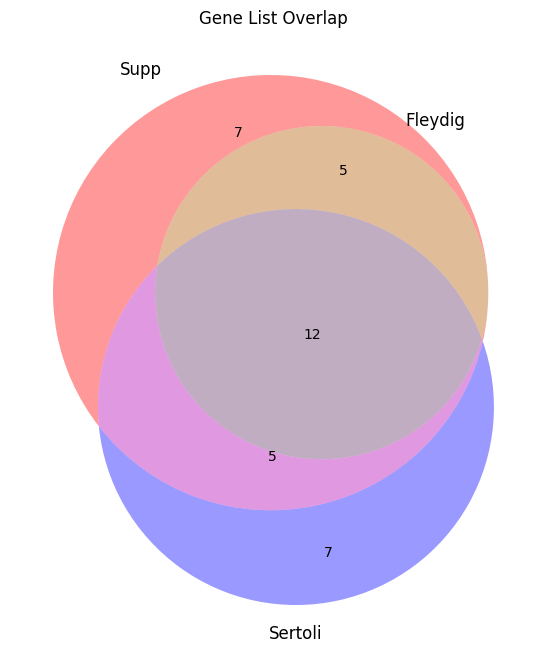

In [225]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Extract gene lists
supp_gene_list = extract_gene_list(supp_gene_file)
fleydig_gene_list = extract_gene_list(fleydig_gene_file)
sertoli_gene_list = extract_gene_list(sertoli_gene_file)

print("Original lengths:")
print("Supp list:", len(supp_gene_list))
print("Fleydig list:", len(fleydig_gene_list))
print("Sertoli list:", len(sertoli_gene_list))

# Convert to sets (unique genes)
supp_set = set(supp_gene_list)
fleydig_set = set(fleydig_gene_list)
sertoli_set = set(sertoli_gene_list)

print("\nAfter converting to sets (unique):")
print("Supp set:", len(supp_set))
print("Fleydig set:", len(fleydig_set))
print("Sertoli set:", len(sertoli_set))

# Draw Venn diagram
plt.figure(figsize=(8, 8))
venn3([supp_set, fleydig_set, sertoli_set],
      set_labels=('Supp', 'Fleydig', 'Sertoli'))

plt.title("Gene List Overlap")
plt.show()


In [226]:
# Genes only in supp_set
supp_only = supp_set - fleydig_set - sertoli_set

# Genes only in fleydig_set
fleydig_only = fleydig_set - supp_set - sertoli_set

# Genes only in sertoli_set
sertoli_only = sertoli_set - supp_set - fleydig_set

print("Genes only in Supp:", len(supp_only))
print("Genes only in Fleydig:", len(fleydig_only))
print("Genes only in Sertoli:", len(sertoli_only))




Genes only in Supp: 7
Genes only in Fleydig: 0
Genes only in Sertoli: 7


In [223]:

# Save Supp only
unique_supp_gene_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/unique_genes/unique_gene_supp_{dominant_percentage_threshold}.txt"
unique_fleydig_gene_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/unique_genes/unique_gene_fleydig_{dominant_percentage_threshold}.txt"
unique_sertoli_gene_file = f"/group/tran3/duytran/cre_pipeline/Results/cell_type_specific_regions/unique_genes/unique_gene_sertoli_{dominant_percentage_threshold}.txt"


pd.Series(sorted(supp_only)).to_csv(unique_supp_gene_file, index=False, header=False)
pd.Series(sorted(fleydig_only)).to_csv(unique_fleydig_gene_file, index=False, header=False)
pd.Series(sorted(sertoli_only)).to_csv(unique_sertoli_gene_file, index=False, header=False)


In [135]:
# import pandas as pd

# # Example inputs (you should replace with your actual dataframes)
# # subset_df_sorted = pd.read_csv("...")
# # merged_df = pd.read_csv("...")

# desired_cell_types = ['MesLHX9']
# match_count_threshold = 1
# dominant_percentage_threshold = 0.5  # e.g., 30%

# # Iterate over each cell type
# for cell_type in desired_cell_types:
#     master_bed = pd.DataFrame(columns=['chrom', 'start', 'end', 'col4'])
    
#     # Filter subsets containing this cell type and passing match_count threshold
#     subset_filtered = subset_df_sorted[
#         subset_df_sorted['subset'].apply(lambda x: cell_type in x)
#         & (subset_df_sorted['match_count'] > match_count_threshold)
#     ]

#     print(subset_filtered.shape)
#     # # print(subset_filtered.head())
#     # Iterate through each matching subset
#     for _, row in subset_filtered.iterrows():
#         # print("start traversing")
#         row_indices = row['row_index']  # This should be a list of indices
#         if not row_indices:
#             continue
        
#         # Get the subset of merged_df for these indices
#         score_sub_df = merged_df.loc[row_indices].copy()
#         # print(f"score_sub_df.shape: {score_sub_df.shape}")

#         def calculate_percentage(col4_str, target_cell):
#             # Example: MesLHX9_13_Epi_4_Endo_6 => split on '_'
#             parts = col4_str.split('_')
#             # Cell type names are in even positions, counts in odd positions
#             counts = {parts[i]: int(parts[i+1]) for i in range(0, len(parts)-1, 2)}
#             total = sum(counts.values())
#             target_count = counts.get(target_cell, 0)
#             return target_count / total if total > 0 else 0

#         # Calculate dominant percentage
#         score_sub_df['dominant_percentage'] = score_sub_df['col4'].apply(
#             lambda s: calculate_percentage(s, cell_type)
#         )
#         # print(f"score_sub_df: {score_sub_df}")

#         # Filter by dominant percentage threshold
#         score_sub_df_filtered = score_sub_df[
#             score_sub_df['dominant_percentage'] > dominant_percentage_threshold
#         ]
#         # print(f"score_sub_df_filtered.shape: {score_sub_df_filtered.shape}")
#         # print(f"score_sub_df_filtered: {score_sub_df_filtered}")
        

#         # Select columns to export
#         bed_df = score_sub_df_filtered[['chrom', 'start', 'end', 'dominant_percentage', 'col4']]

#         # Append to master bed dataframe
#         master_bed = pd.concat([master_bed, bed_df], ignore_index=True)
    
#     # # Save or submit master bed
#     # master_bed_file = f"{cell_type}_master.bed"
#     # master_bed.to_csv(master_bed_file, sep='\t', index=False, header=False)

#     # # print(f"Generated BED file for {cell_type}: {master_bed_file}")
# master_bed

(274, 4)


,chrom,start,end,col4,dominant_percentage
0,chr7,153319801,153321132,Supp_3_MesLHX9_45_Epi_1_Endo_1_Neuro_13_Missin...,0.555556


In [32]:
# mask = subset_df_sorted['subset'].apply(lambda x: 'Sertoli' in x)

# # Access those rows
# sertoli_rows = subset_df_sorted[mask]
# sertoli_rows = sertoli_rows[sertoli_rows['match_count'] > 10]

# print(sertoli_rows)

# # (Supp, Neuro, Sertoli, MesGATA2)  : 4 regions: XYZZT
# XYZT - sertoli dominant cells --> XT
# # do the same thing for other subsets: AB, IO,
# # we put all of these regions in a single bed file --> genome browser

# # do for other cell types: 
# # (Supp, Neuro, MesGATA2): 3 region A, B, C 



# # for each cell type in desired cell types:
#     # create a master bed file empty for genome browser
#     # we explore all subsets with this cell type in subset_df_sorted - subset column, and match_count > threshold (> threshold regions):
#     # for each subset: 
#         # extract the corresponding row_index column, which is a list of row index linked to score_df
#         # extract the dataframe from this row index, which has the following format, where celltype_count_celltyp2_count_celltype3_count_....:
#             # 0  chr1  1132587  1133945  MesLHX9_13_Epi_4_Endo_6_Neuro_11_Missing_4_Mes...
#             # 1  chr1  1298775  1300675  Supp_18_MesLHX9_12_Epi_4_Endo_6_Neuro_55_Missi...
#             # 2  chr1  1324133  1325763  Supp_37_MesLHX9_88_Epi_20_Endo_30_Neuro_110_Mi...
#         # calculate the percentage for the cell_type in an extra column called dominant_percentage: e.g Endo = 6/(13+4+6+ ...)
#         # we filter for dominant cell type regions where the percentage > some threshold
#         # we add these regions into a master bed file, including chrom, start, end, and col4
#     # submit it to genome browser

                                        subset  subset_length  \
0   (Supp, MesLHX9, Sertoli, MesGATA2, Immune)              5   
1             (Supp, Neuro, Sertoli, MesGATA2)              4   
2                 (Supp, Endo, Neuro, Sertoli)              4   
4           (Supp, MesLHX9, Sertoli, MesGATA2)              4   
8           (Supp, Missing, Sertoli, MesGATA2)              4   
9   (MesLHX9, Endo, Sertoli, MesGATA2, Immune)              5   
11             (MesLHX9, Endo, Neuro, Sertoli)              4   
12         (Neuro, Missing, Sertoli, MesGATA2)              4   
13      (Supp, MesLHX9, Endo, Sertoli, Immune)              5   
17    (Supp, Neuro, Sertoli, MesGATA2, Immune)              5   
19                  (Neuro, Sertoli, MesGATA2)              3   
20            (Supp, MesLHX9, Sertoli, Immune)              4   
25         (Neuro, Sertoli, MesGATA2, FLeydig)              4   
26   (Supp, MesLHX9, Neuro, Sertoli, MesGATA2)              5   
27       (Supp, Epi, Neur

In [17]:

target_set = {'FLeydig', 'CoelEpi', 'Immune', 'Sertoli', 'PV', 'Epi'}

# Check if any row's subset column (converted to set) matches exactly
mask = subset_df['subset'].apply(lambda x: set(x) == target_set)

# Check if at least one row matches
has_match = mask.any()

print("Any row matches exactly:", has_match)

# Optionally: print which rows match
print(subset_df[mask])

Any row matches exactly: True
                                            subset  subset_length row_index  \
3883  (Epi, Sertoli, FLeydig, PV, CoelEpi, Immune)              6      [10]   

      match_count  
3883            1  


In [7]:
# Define cell types
# cell_types = [
#     "MesLHX9", "MesGATA2", "Supp", "preGran", "Missing", "Endo",
#     "PV", "CoelEpi", "Epi", "Neuro", "Immune", "Germ", "SMC"
# ]

map_dict = {
    "Supporting": "Supp",
    "Mesenchymal_LHX9": "MesLHX9",
    "Epithelial": "Epi",
    "Endothelial": "Endo",
    "Neural": "Neuro",
    "missing": "Missing",
    "Erythroid": "Eryth",
    "Sertoli": "Sertoli",
    "Mesenchymal_GATA2": "MesGATA2",
    "FetalLeydig": "FLeydig",
    "PV": "PV",
    "CoelEpi": "CoelEpi",
    "Immune": "Immune"
}

cell_types = list(map_dict.values())




# Generate all non-empty subsets
all_subsets = []
for r in range(1, len(cell_types) + 1):
    all_subsets.extend(combinations(cell_types, r))

# Evaluate subsets across records
results = []
col4_values = bed_df["col4"].astype(str)

for subset in all_subsets:
    subset_len = len(subset)
    matched_indices = [
        idx for idx, val in enumerate(col4_values)
        if all(cell in val for cell in subset)
    ]
    results.append({
        "subset": subset,
        "subset_length": subset_len,
        "row_index": matched_indices,
        "match_count": len(matched_indices)
    })

# Convert to DataFrame
subset_df = pd.DataFrame(results)

# Example output
subset_df

,subset,subset_length,row_index,match_count
0,"(MesLHX9,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7592
1,"(MesGATA2,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7600
2,"(Supp,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7597
3,"(preGran,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7590
4,"(Missing,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7572
...,...,...,...,...
8186,"(MesLHX9, MesGATA2, Supp, Missing, Endo, PV, C...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8187,"(MesLHX9, MesGATA2, preGran, Missing, Endo, PV...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8188,"(MesLHX9, Supp, preGran, Missing, Endo, PV, Co...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8189,"(MesGATA2, Supp, preGran, Missing, Endo, PV, C...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160


In [8]:
subset_df_sorted = subset_df.sort_values(by=["subset_length", "match_count"], ascending=[True, False]).reset_index(drop=True)
subset_df_sorted

# MesGATA2: only specific to MesGata2 
# bed file:
# chrX - start - end - ovary_MesGATA2

# MesGATA2 + Supp 
# chrX - start - end - ovary_MesGATA2 + Supp 

# Query: 
# for subset_length between (1,13):
# explore any possible combination with this subset_length:
# 

# threshold

,subset,subset_length,row_index,match_count
0,"(MesGATA2,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7600
1,"(Supp,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7597
2,"(MesLHX9,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7592
3,"(preGran,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7590
4,"(Epi,)",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7590
...,...,...,...,...
8186,"(MesLHX9, MesGATA2, Supp, Missing, Endo, PV, C...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8187,"(MesLHX9, MesGATA2, preGran, Missing, Endo, PV...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8188,"(MesLHX9, Supp, preGran, Missing, Endo, PV, Co...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8189,"(MesGATA2, Supp, preGran, Missing, Endo, PV, C...",12,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160


In [10]:
subset_df_sorted.tail(30)

,subset,subset_length,row_index,match_count
8161,"(MesLHX9, MesGATA2, preGran, Missing, Endo, PV...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8162,"(MesLHX9, MesGATA2, preGran, Endo, PV, CoelEpi...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8163,"(MesLHX9, MesGATA2, Missing, Endo, PV, CoelEpi...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8164,"(MesLHX9, Supp, preGran, Missing, Endo, PV, Co...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8165,"(MesLHX9, Supp, preGran, Missing, Endo, PV, Co...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8166,"(MesLHX9, Supp, preGran, Missing, Endo, PV, Ep...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8167,"(MesLHX9, Supp, preGran, Endo, PV, CoelEpi, Ep...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8168,"(MesLHX9, Supp, Missing, Endo, PV, CoelEpi, Ep...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8169,"(MesLHX9, preGran, Missing, Endo, PV, CoelEpi,...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
8170,"(MesGATA2, Supp, preGran, Missing, Endo, PV, C...",11,"[4, 9, 57, 76, 113, 115, 149, 200, 250, 257, 2...",160
